In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dropout, Dense, LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from plot import plot_training_vs_validation
from sklearn.metrics import confusion_matrix, classification_report

## Binary Class | LSTM

In [4]:
bin_data = pd.read_csv("bin_data.csv")
multi_data = pd.read_csv("multi_data.csv")

In [165]:
X = bin_data.drop(columns=['label'],axis=1)
Y = bin_data['label']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=50)

X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))

In [169]:
unique_labels = np.unique(y_train)
num_classes = len(unique_labels)

print("Unique Labels:", unique_labels)
print("Number of Classes:", num_classes)

Unique Labels: [0 1 2 3 4 5 6 7 8]
Number of Classes: 9


In [171]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(64, activation='relu', input_shape=(14, 1)))
lstm_model.add(Dense(64, activation='relu'))
lstm_model.add(Dense(num_classes, activation='softmax'))

adam_optimizer = Adam(learning_rate=1e-4)
lstm_model.compile(loss='sparse_categorical_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

lstm_history = lstm_model.fit(
     X_train_reshaped, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_test_reshaped, y_test),
    callbacks=callbacks
)


Epoch 1/50
364/364 [==============================] - 28s 23ms/step - loss: 1.1670 - accuracy: 0.6941 - val_loss: 0.3037 - val_accuracy: 0.8320
Epoch 2/50
364/364 [==============================] - 7s 20ms/step - loss: 0.2622 - accuracy: 0.8769 - val_loss: 0.2281 - val_accuracy: 0.9482
Epoch 3/50
364/364 [==============================] - 8s 21ms/step - loss: 0.2053 - accuracy: 0.9428 - val_loss: 0.1706 - val_accuracy: 0.9509
Epoch 4/50
364/364 [==============================] - 8s 21ms/step - loss: 0.1645 - accuracy: 0.9497 - val_loss: 0.1789 - val_accuracy: 0.9489
Epoch 5/50
364/364 [==============================] - 8s 23ms/step - loss: 0.1472 - accuracy: 0.9520 - val_loss: 0.1385 - val_accuracy: 0.9526
Epoch 6/50
364/364 [==============================] - 8s 21ms/step - loss: 0.1449 - accuracy: 0.9520 - val_loss: 0.1405 - val_accuracy: 0.9497
Epoch 7/50
364/364 [==============================] - 8s 21ms/step - loss: 0.1410 - accuracy: 0.9528 - val_loss: 0.1771 - val_accuracy: 0.950

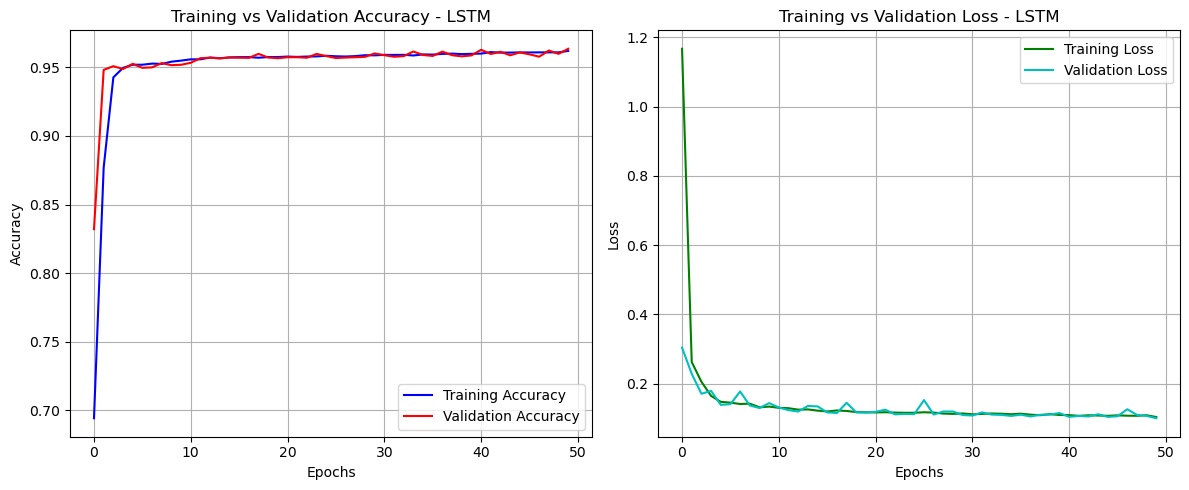

In [172]:
plot_training_vs_validation(lstm_history, "LSTM")

In [176]:
from sklearn.metrics import confusion_matrix, classification_report

y_test_probabilities = lstm_model.predict(X_test_reshaped)
y_test_pred = np.argmax(y_test_probabilities, axis=1)

conf_matrix = confusion_matrix(y_test, y_test_pred)

728/728 [==============================] - 3s 3ms/step


In [177]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[17309    86]
 [  761  5115]]


In [178]:
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17395
           1       0.98      0.87      0.92      5876

    accuracy                           0.96     23271
   macro avg       0.97      0.93      0.95     23271
weighted avg       0.96      0.96      0.96     23271

